<a href="https://colab.research.google.com/github/pruthvi-jas/NYC-Taxi-Trip-Time-prediction/blob/main/Project_6_NYC_Taxi_Trip_Time_Prediction_on_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC Taxi Trip Time Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member - Chovatiya Pruthvi Vallabhbhai**


# **Project Summary -**

The New York Taxi Trip Duration Prediction project aims to develop a machine learning model that accurately predicts the duration of taxi trips in New York City using historical trip data. This predictive model can help taxi companies optimize fleet management, improve pricing strategies, and enhance customer satisfaction by providing more accurate arrival time estimates.

The dataset consists of 1,048,000 taxi trips, each containing features such as pickup/dropoff timestamps, geographic coordinates (latitude and longitude), passenger count, vendor ID, and the actual trip duration in seconds (the target variable). The challenge lies in preprocessing this large dataset, extracting meaningful features, and training a robust regression model that generalizes well to unseen data.
##Project Objectives


1.  **Data Preprocessing & Cleaning:**
*   Handle missing values, outliers, and inconsistencies in the dataset.
*   Convert datetime strings into structured features (hour, day, month, etc.).
*   Validate data integrity and remove erroneous records (e.g., trips with zero duration or impossible coordinates).

2.  **Exploratory Data Analysis (EDA) & Visualization:**
*   Analyze the distribution of trip durations and identify skewness.
*   Visualize pickup/dropoff hotspots using geographic maps.
*   Examine correlations between trip duration and other variables (passenger count, time of day, distance, etc.).

3.  **Feature Engineering:**
*   Extract temporal features (hour of day, day of week, weekend vs. weekday).
*   Derive speed-related metrics to detect anomalies (e.g., unrealistically fast trips).
*   Encode categorical variables (vendor ID, store-and-forward flag).

4.  **Model Development & Evaluation:**
*   Train and compare multiple regression models (Linear Regression, Random Forest, Gradient Boosting, XGBoost).
*   Perform train-test split and use cross-validation to assess model performance.
*   Evaluate models using metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² score.

5. **Model Deployment & Insights:**
*  Select the best-performing model based on evaluation metrics.
*  Interpret feature importance to understand key factors affecting trip duration.
*  Summarize findings in a structured report with visualizations.

# **GitHub Link -**

https://github.com/pruthvi-jas/NYC-Taxi-Trip-Time-prediction

# **Problem Statement**


**"Predicting taxi trip durations in New York City is challenging due to dynamic factors like traffic condition and weather. Current estimation systems often rely on simplistic distance-based calculations, leading to inaccurate predictions. This project seeks to build a robust regression model that leverages machine learning to provide more precise trip duration forecasts, helping taxi services reduce wait times, allocate resources efficiently, and improve pricing strategies."**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Core Data Handling
import numpy as np
import pandas as pd
from datetime import datetime

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

import geopy.distance
from geopy.distance import distance

from google.colab import data_table

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis Tech Minds e/Project/Project 6 Regression (NYC Taxi Trip Time Prediction)/Copy of NYC Taxi Data.csv')

### Dataset First View

In [ ]:
df.head()

id  vendor_id   pickup_datetime  dropoff_datetime  passenger_count  \
0  id2875421          2  14-03-2016 17:24  14-03-2016 17:32                1   
1  id2377394          1  12-06-2016 00:43  12-06-2016 00:54                1   
2  id3858529          2  19-01-2016 11:35  19-01-2016 12:10                1   
3  id3504673          2  06-04-2016 19:32  06-04-2016 19:39                1   
4  id2181028          2  26-03-2016 13:30  26-03-2016 13:38                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

### Dataset Rows & Columns count

In [ ]:
df.shape

(1048575, 11)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048575 non-null  object 
 1   vendor_id           1048575 non-null  int64  
 2   pickup_datetime     1048575 non-null  object 
 3   dropoff_datetime    1048575 non-null  object 
 4   passenger_count     1048575 non-null  int64  
 5   pickup_longitude    1048575 non-null  float64
 6   pickup_latitude     1048575 non-null  float64
 7   dropoff_longitude   1048575 non-null  float64
 8   dropoff_latitude    1048575 non-null  float64
 9   store_and_fwd_flag  1048575 non-null  object 
 10  trip_duration       1048575 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 88.0+ MB


#### Duplicate Values

In [ ]:
# Check for fully duplicated rows (all columns identical)
print(f"Total duplicate rows: {df.duplicated().sum()}")

# Check for duplicate trip IDs (should be unique)
print(f"Duplicate trip IDs: {df['id'].duplicated().sum()}")

Total duplicate rows: 0
Duplicate trip IDs: 0


#### Missing Values/Null Values

In [ ]:
# Get missing values count per column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])  # Only show columns with missing values

Missing values per column:
Series([], dtype: int64)


### What did you know about your dataset?

1. **Basic Structure:**
*  Total Rows: 1,048,575 taxi trip records
*  Columns: 11 features describing each trip

2. **Data Completeness:**
*  No Missing Values: All columns show 1,048,575 non-null entries
*  No Duplicates: Both full-row duplicates (0) and duplicate trip IDs (0) are absent
*  Conclusion: The dataset is complete and unique at the record level

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# For numerical columns
num_stats = df.describe().round(2)
display(num_stats)

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1048575.00       1048575.00        1048575.00       1048575.00   
mean         1.53             1.66            -73.97            40.75   
std          0.50             1.31              0.04             0.03   
min          1.00             0.00            -78.55            34.36   
25%          1.00             1.00            -73.99            40.74   
50%          2.00             1.00            -73.98            40.75   
75%          2.00             2.00            -73.97            40.77   
max          2.00             9.00            -61.34            51.88   

       dropoff_longitude  dropoff_latitude  trip_duration  
count         1048575.00        1048575.00     1048575.00  
mean              -73.97             40.75         962.14  
std                 0.04              0.04        5853.00  
min               -79.82             32.18           1.00  
25%               -73.99             40.74         397.00  
50%               -73.98             40.75         662.00  
75%               -73.96             40.77        1075.00  
max               -61.34             43.91     3526282.00

### Variables Description

This dataset contains 1,048,575 taxi trip records with 11 variables. Key features include pickup/dropoff timestamps (to be converted to datetime), GPS coordinates and passenger counts. The target variable 'trip_duration' (seconds) shows extreme values requiring outlier handling. Categorical variables include vendor_id and store_and_fwd_flag (Y/N). Each trip has a unique alphanumeric ID. The data is complete (no nulls) with verified no duplicates. Geographic coordinates enable distance calculation, while timestamps allow temporal analysis. The dataset supports predicting trip duration using spatial, temporal and operational features after proper preprocessing of datatypes and outlier removal.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                    1048575
vendor_id                   2
pickup_datetime        237127
dropoff_datetime       237442
passenger_count            10
pickup_longitude        21382
pickup_latitude         42587
dropoff_longitude       30924
dropoff_latitude        58292
store_and_fwd_flag          2
trip_duration            6883
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Convert to datetime while specifying the exact format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%d-%m-%Y %H:%M')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format='%d-%m-%Y %H:%M')

In [ ]:
# Verify conversion
print("\nAfter Conversion:")
print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)


After Conversion:
pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object


In [ ]:
# Extract date components (creates new columns)
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_weekday'] = df['pickup_datetime'].dt.day_name()
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_week'] = df['pickup_datetime'].dt.isocalendar().week
df['pickup_quarter'] = df['pickup_datetime'].dt.quarter

In [ ]:
# Extract date components (creates new columns)
df['dropoff_year'] = df['dropoff_datetime'].dt.year
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_weekday'] = df['dropoff_datetime'].dt.day_name()
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_week'] = df['dropoff_datetime'].dt.isocalendar().week
df['dropoff_quarter'] = df['dropoff_datetime'].dt.quarter

In [ ]:
df.describe()

vendor_id                pickup_datetime  \
count  1.048575e+06                        1048575   
mean   1.534503e+00  2016-04-01 09:21:33.340276480   
min    1.000000e+00            2016-01-01 00:00:00   
25%    1.000000e+00            2016-02-17 15:57:00   
50%    2.000000e+00            2016-04-01 16:12:00   
75%    2.000000e+00            2016-05-15 02:58:00   
max    2.000000e+00            2016-06-30 23:59:00   
std    4.988084e-01                            NaN   

                    dropoff_datetime  passenger_count  pickup_longitude  \
count                        1048575     1.048575e+06      1.048575e+06   
mean   2016-04-01 09:37:35.439696640     1.664382e+00     -7.397342e+01   
min              2016-01-01 00:03:00     0.000000e+00     -7.854740e+01   
25%              2016-02-17 16:14:00     1.000000e+00     -7.399186e+01   
50%              2016-04-01 16:30:00     1.000000e+00     -7.398174e+01   
75%              2016-05-15 03:14:00     2.000000e+00     -7.396731e+01   
max              2016-07-01 23:02:00     9.000000e+00     -6.133553e+01   
std                              NaN     1.314261e+00      4.280165e-02   

       pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
count     1.048575e+06       1.048575e+06      1.048575e+06   1.048575e+06   
mean      4.075094e+01      -7.397336e+01      4.075183e+01   9.621448e+02   
min       3.435970e+01      -7.981798e+01      3.218114e+01   1.000000e+00   
25%       4.073738e+01      -7.399131e+01      4.073594e+01   3.970000e+02   
50%       4.075415e+01      -7.397973e+01      4.075455e+01   6.620000e+02   
75%       4.076836e+01      -7.396301e+01      4.076984e+01   1.075000e+03   
max       5.188108e+01      -6.133553e+01      4.391176e+01   3.526282e+06   
std       3.381389e-02       4.274282e-02      3.645002e-02   5.853002e+03   

       pickup_year  ...    pickup_day   pickup_hour  pickup_week  \
count    1048575.0  ...  1.048575e+06  1.048575e+06    1048575.0   
mean        2016.0  ...  1.549864e+01  1.360848e+01    13.838326   
min         2016.0  ...  1.000000e+00  0.000000e+00          1.0   
25%         2016.0  ...  8.000000e+00  9.000000e+00          7.0   
50%         2016.0  ...  1.500000e+01  1.400000e+01         13.0   
75%         2016.0  ...  2.300000e+01  1.900000e+01         20.0   
max         2016.0  ...  3.100000e+01  2.300000e+01         53.0   
std            0.0  ...  8.703651e+00  6.400348e+00     8.570182   

       pickup_quarter  dropoff_year  dropoff_month   dropoff_day  \
count    1.048575e+06     1048575.0   1.048575e+06  1.048575e+06   
mean     1.503290e+00        2016.0   3.516249e+00  1.549887e+01   
min      1.000000e+00        2016.0   1.000000e+00  1.000000e+00   
25%      1.000000e+00        2016.0   2.000000e+00  8.000000e+00   
50%      2.000000e+00        2016.0   4.000000e+00  1.500000e+01   
75%      2.000000e+00        2016.0   5.000000e+00  2.300000e+01   
max      2.000000e+00        2016.0   7.000000e+00  3.100000e+01   
std      4.999894e-01           0.0   1.680947e+00  8.703661e+00   

       dropoff_hour  dropoff_week  dropoff_quarter  
count  1.048575e+06     1048575.0     1.048575e+06  
mean   1.360126e+01     13.837558     1.503465e+00  
min    0.000000e+00           1.0     1.000000e+00  
25%    9.000000e+00           7.0     1.000000e+00  
50%    1.400000e+01          13.0     2.000000e+00  
75%    1.900000e+01          20.0     2.000000e+00  
max    2.300000e+01          53.0     3.000000e+00  
std    6.484311e+00      8.567478     5.001751e-01  

[8 rows x 21 columns]

In [ ]:
zero_passenger_trips = df[df['passenger_count'] == 0]
print(f"Trips with 0 passengers: {len(zero_passenger_trips)}")

Trips with 0 passengers: 39


In [ ]:
df['passenger_count'] = df['passenger_count'].replace(0, 1)  # Assume solo rider

In [ ]:
# Drop specific columns by name
df = df.drop(columns=['pickup_year', 'dropoff_year'])

In [ ]:
#Interaction table between pickup_quarter and sum of id
pickup_quarter_trip_count = df.groupby('pickup_quarter').size().reset_index(name='trip_count')
print(pickup_quarter_trip_count)

   pickup_quarter  trip_count
0               1      520838
1               2      527737


In [ ]:
#Interaction table between pickup_week and sum of id
pickup_week_trip_count = df.groupby('pickup_week').size().reset_index(name='trip_count')
print(pickup_week_trip_count)

    pickup_week  trip_count
0             1       38247
1             2       40984
2             3       32682
3             4       38725
4             5       40624
5             6       42489
6             7       41009
7             8       42110
8             9       43006
9            10       41428
10           11       42453
11           12       40173
12           13       41215
13           14       43750
14           15       43230
15           16       40113
16           17       40842
17           18       42784
18           19       41267
19           20       42152
20           21       37451
21           22       38755
22           23       39457
23           24       38833
24           25       38982
25           26       21348
26           53       14466


In [ ]:
#Interaction table between pickup_hour and sum of id
pickup_hour_trip_count = df.groupby('pickup_hour').size().reset_index(name='trip_count')
print(pickup_hour_trip_count)

    pickup_hour  trip_count
0             0       38350
1             1       27680
2             2       20136
3             3       15059
4             4       11341
5             5       10767
6             6       23896
7             7       39988
8             8       48006
9             9       48631
10           10       46870
11           11       49132
12           12       51638
13           13       51342
14           14       53669
15           15       51561
16           16       46495
17           17       54880
18           18       65265
19           19       64930
20           20       60342
21           21       60585
22           22       57595
23           23       50417


In [ ]:
#Interaction table between pickup_weekday and sum of id
pickup_weekday_trip_count = df.groupby('pickup_weekday').size().reset_index(name='trip_count')
print(pickup_weekday_trip_count)

  pickup_weekday  trip_count
0         Friday      160735
1         Monday      134673
2       Saturday      158855
3         Sunday      140715
4       Thursday      157241
5        Tuesday      145288
6      Wednesday      151068


In [ ]:
#Interaction table between pickup_month and sum of id
pickup_month_trip_count = df.groupby('pickup_month').size().reset_index(name='trip_count')
print(pickup_month_trip_count)

   pickup_month  trip_count
0             1      165104
1             2      171599
2             3      184135
3             4      180940
4             5      178585
5             6      168212


In [ ]:
#Interaction table between pickup_day and sum of id
pickup_day_trip_count = df.groupby('pickup_day').size().reset_index(name='trip_count')
print(pickup_day_trip_count)

    pickup_day  trip_count
0            1       33716
1            2       34303
2            3       34599
3            4       35706
4            5       35986
5            6       35608
6            7       35129
7            8       34660
8            9       35682
9           10       35160
10          11       34944
11          12       35760
12          13       35467
13          14       36207
14          15       35702
15          16       36706
16          17       35180
17          18       34448
18          19       35430
19          20       35541
20          21       34930
21          22       34109
22          23       29871
23          24       31576
24          25       33262
25          26       34083
26          27       33647
27          28       33048
28          29       33564
29          30       28114
30          31       16437


In [ ]:
# Drop specific columns by name
df = df.drop(columns=['pickup_quarter', 'pickup_week', 'pickup_day', 'dropoff_day','dropoff_week','dropoff_quarter'])

In [ ]:
# Group by pickup hour and sum passenger counts
hourly_passengers = df.groupby('pickup_hour')['passenger_count'].sum().reset_index()
print("Total passengers per hour:")
print(hourly_passengers)

Total passengers per hour:
    pickup_hour  passenger_count
0             0            64706
1             1            47337
2             2            34291
3             3            25710
4             4            19346
5             5            17036
6             6            36801
7             7            63140
8             8            77167
9             9            78788
10           10            77466
11           11            81807
12           12            86311
13           13            85592
14           14            90382
15           15            86322
16           16            77839
17           17            91713
18           18           108534
19           19           108262
20           20           100956
21           21           102363
22           22            97824
23           23            85575


In [ ]:
# Group by pickup weekday and sum passenger counts
weekday_passengers = df.groupby('pickup_weekday')['passenger_count'].sum().reset_index()
print("Total passengers per weekday:")
print(weekday_passengers)

Total passengers per weekday:
  pickup_weekday  passenger_count
0         Friday           266758
1         Monday           220154
2       Saturday           274712
3         Sunday           241752
4       Thursday           257642
5        Tuesday           237647
6      Wednesday           246603


In [ ]:
# Group by pickup month and sum passenger counts
monthly_passengers = df.groupby('pickup_month')['passenger_count'].sum().reset_index()
print("Total passengers per month:")
print(monthly_passengers)

Total passengers per month:
   pickup_month  passenger_count
0             1           276193
1             2           285155
2             3           306027
3             4           302223
4             5           296903
5             6           278767


In [ ]:
# Group by day AND hour to see peak times                                       #chart
daily_weekly_passengers = df.groupby(['pickup_weekday', 'pickup_hour'])['passenger_count'].sum().reset_index()
print("\nPassengers by day and hour:")
print(daily_weekly_passengers.head())


Passengers by day and hour:
  pickup_weekday  pickup_hour  passenger_count
0         Friday            0            10294
1         Friday            1             7098
2         Friday            2             4877
3         Friday            3             3621
4         Friday            4             2908


In [ ]:
df['distance_km'] = [
    distance((p_lat, p_lon), (d_lat, d_lon)).km
    for p_lat, p_lon, d_lat, d_lon in zip(
        df['pickup_latitude'],
        df['pickup_longitude'],
        df['dropoff_latitude'],
        df['dropoff_longitude']
    )
]

In [ ]:
# Calculate speed (km/h)
df['speed_kmh'] = df['distance_km'] / (df['trip_duration'] / 3600)

In [ ]:
# Passenger count distribution
passenger_dist = df['passenger_count'].value_counts().sort_index()
print(passenger_dist)

passenger_count
1    743171
2    151078
3     43033
4     20336
5     56252
6     34700
7         3
8         1
9         1
Name: count, dtype: int64


In [ ]:
day_start = pd.to_datetime('07:30:00').time()
day_end = pd.to_datetime('19:29:59').time()

df['is_day'] = df['pickup_datetime'].dt.time.apply(
    lambda x: 1 if day_start <= x <= day_end else 0
)

# Verify counts
print("Day/Night Distribution:")
print(df['is_day'].value_counts())

Day/Night Distribution:
is_day
1    622630
0    425945
Name: count, dtype: int64


In [ ]:
weekday_map = {
    'Sunday': 0, 'Monday': 1, 'Tuesday': 2,
    'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6
}

df['pickup_weekday'] = df['pickup_weekday'].map(weekday_map)
df['dropoff_weekday'] = df['dropoff_weekday'].map(weekday_map)


In [ ]:
print(df['pickup_weekday'])

0          1
1          0
2          2
3          3
4          6
          ..
1048570    3
1048571    4
1048572    2
1048573    2
1048574    2
Name: pickup_weekday, Length: 1048575, dtype: int64


In [ ]:
# Handling Outliers & Outlier treatments
zero_speed_count = (df['speed_kmh'] == 0).sum()
print(f"Number of records with 0 km/h speed: {zero_speed_count}")

above_150_speed_count = (df['speed_kmh'] > 150).sum()
print(f"Number of records with above 150 km/h speed: {above_150_speed_count}")

Number of records with 0 km/h speed: 4286
Number of records with above 150 km/h speed: 75


In [ ]:
# Summary of outlier trips
outliers = df[df['speed_kmh'] > 125]  # Example threshold
print(f"Found {len(outliers)} speed_km outliers (>125 km)")
print(outliers[['speed_kmh', 'trip_duration', 'pickup_datetime', 'vendor_id']].describe())

Found 102 speed_km outliers (>125 km)
         speed_kmh  trip_duration                pickup_datetime   vendor_id
count   102.000000     102.000000                            102  102.000000
mean    572.321557     156.558824  2016-04-02 21:58:31.764706048    1.833333
min     125.102664       1.000000            2016-01-01 00:41:00    1.000000
25%     146.206918       4.250000            2016-02-12 23:53:30    2.000000
50%     207.051688      11.000000            2016-04-04 03:02:30    2.000000
75%     445.499486     169.250000            2016-05-17 13:18:15    2.000000
max    6874.214784    2515.000000            2016-06-30 05:01:00    2.000000
std    1078.744546     343.626541                            NaN    0.374518


In [ ]:
# Get realistic speed range (1-50 km/h)
valid_speeds = df[
    (df['speed_kmh'] >= 1) &
    (df['speed_kmh'] <= 50)
]

avg_speed = valid_speeds['speed_kmh'].mean()
print(f"Average speed (without outliers): {avg_speed:.2f} km/h")

Average speed (without outliers): 14.43 km/h


In [ ]:
df['speed_kmh'] = df['speed_kmh'].apply(lambda x: avg_speed if x > 125 else x)

In [ ]:
  # Calculate IQR (Interquartile Range)
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds (1.5×IQR is typical)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Normal trip duration range: {lower_bound:.0f}s to {upper_bound:.0f}s")

Normal trip duration range: -620s to 2092s


In [ ]:
print(df.groupby('vendor_id')['trip_duration'].mean())
print(df.groupby('vendor_id')['trip_duration'].median())

vendor_id
1     850.870521
2    1059.053373
Name: trip_duration, dtype: float64
vendor_id
1    658.0
2    666.0
Name: trip_duration, dtype: float64


In [ ]:
df_clean = df[
    (df['trip_duration'] >= lower_bound) &
    (df['trip_duration'] <= upper_bound)
]

In [ ]:
anomalies = df_clean[
    (df_clean['distance_km'] > 10) &
    (df_clean['trip_duration'] < 600)  # 10 km in <10 mins
]
print(f"Potential data errors: {len(anomalies)} trips")

Potential data errors: 33 trips


In [ ]:
df_clean = df_clean[~((df_clean['distance_km'] > 10) & (df_clean['trip_duration'] < 600))]

In [ ]:
# Identify and remove invalid trips
invalid_trips = (df_clean['distance_km'] < 5) & (df_clean['speed_kmh'] > 120)
df_clean = df_clean[~invalid_trips]  # Keep only valid trips

# Verify removal
print(f"Removed {invalid_trips.sum()} unrealistic trips")
print(f"New dataset size: {len(df_clean)}")

Removed 3 unrealistic trips
New dataset size: 995288


In [ ]:
# Summary of outlier trips
outliers = df_clean[df_clean['distance_km'] > 100]  # Example threshold
print(f"Found {len(outliers)} distance outliers (>100 km)")
print(outliers[['distance_km', 'trip_duration', 'pickup_datetime', 'vendor_id']].describe())

Found 6 distance outliers (>100 km)
       distance_km  trip_duration      pickup_datetime  vendor_id
count     6.000000       6.000000                    6   6.000000
mean    619.969250     903.333333  2016-03-28 02:23:30   1.333333
min     253.987879     611.000000  2016-01-06 20:40:00   1.000000
25%     349.786704     795.000000  2016-02-24 17:30:30   1.000000
50%     509.696483     839.500000  2016-03-31 07:32:00   1.000000
75%     809.504840     918.500000  2016-05-07 06:44:00   1.750000
max    1240.510255    1405.000000  2016-06-02 15:19:00   2.000000
std     378.496461     268.727867                  NaN   0.516398


In [ ]:
# Example: Remove trips with distance > 100 km
outliers = df_clean[df_clean['distance_km'] > 100]
df_clean = df_clean.drop(index=outliers.index)

### What all manipulations have you done and insights you found?

In the dataset five major manupuation and find insights:


1.   Object dataset convert inro datetime64:
     Standardized pickup/dropoff_datetime for temporal analysis.
2.   Extract Month, Weekday and hour from 'pickup_datetime' and 'dropoff_datetime'.
3.   Calculate the speed of traveling.
4.   Find out the total distance of trip.
5.   Weekday object convert into number.
6.   Classify the day and night from the hour column.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Trip Count by Pickup Month')

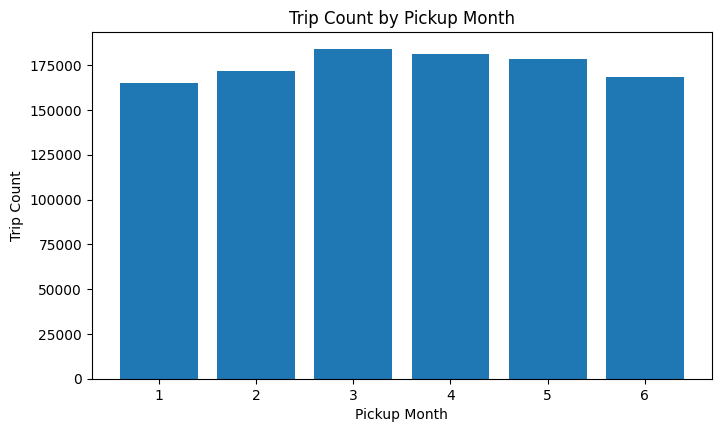

In [ ]:
# Chart - 1 visualization code on pickup_month_trip_count
plt.figure(figsize=(8, 4.5))
plt.bar(pickup_month_trip_count['pickup_month'], pickup_month_trip_count['trip_count'])
plt.xlabel('Pickup Month')
plt.ylabel('Trip Count')
plt.title('Trip Count by Pickup Month')

##### 1. Why did you pick the specific chart?

The frequency counts of values for the various levels of a nominal or categorical variable are displayed in bar charts. Bar charts can occasionally display other statistics, such percentages.Answer Here.
For direct identifying the ralation between the compression-ratio , highway mileage and fuel-type also this charactors relate with average price of different fuel type cars that i have used bar chart for better understanding.

##### 2. What is/are the insight(s) found from the chart?

There is maximumn trip identify in march and april month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For analysis of Month is important to understand taxi trip time prediction because of Month directly related to weather of new york city.
So, important is majorly which season affect positive or negative.
Here, only 6 month data is available. that why we remove that categories.

#### Chart - 2

Text(0, 0.5, 'Number of Trips')

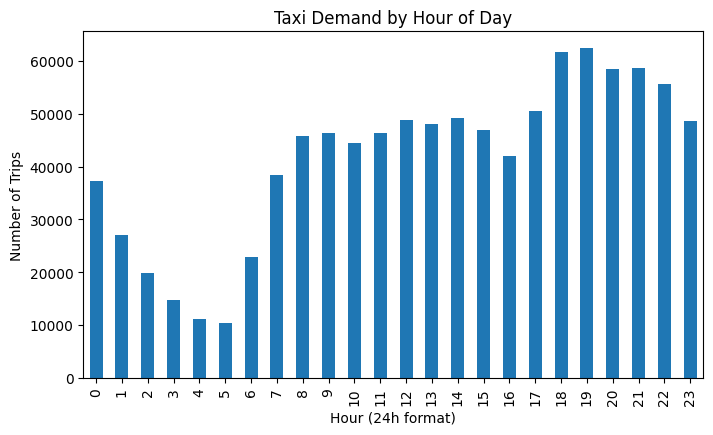

In [ ]:
# Chart - 2 visualization code
# Trips per hour
hourly_trips = df_clean['pickup_hour'].value_counts().sort_index()

# Plot
hourly_trips.plot(kind='bar', figsize=(8,4.5))
plt.title('Taxi Demand by Hour of Day')
plt.xlabel('Hour (24h format)')
plt.ylabel('Number of Trips')

##### 1. Why did you pick the specific chart?

Bars explicitly compare hourly volumes—more effective than line charts for discrete time bins.

##### 2. What is/are the insight(s) found from the chart?

As per the figure there are busiest time is around 6 o'clock and lowest trip at 4 or 5 AM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

According to this analysis we can predict taxi trip at perticuler hour and at max trafic we can charge more to travelling.

#### Chart - 3

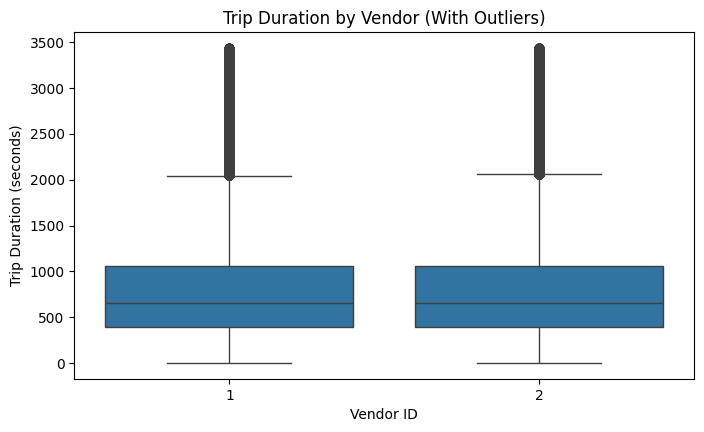

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 4.5))
sns.boxplot(
    x='vendor_id',
    y='trip_duration',
    data=df[df['trip_duration'] < df['trip_duration'].quantile(0.99)],  # Exclude top 1% for better visualization
    showfliers=True  # Show outliers
)
plt.title('Trip Duration by Vendor (With Outliers)')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor ID')
plt.show()

##### 1. Why did you pick the specific chart?

**Outlier Detection:**
Instantly flags extreme durations (dots beyond whiskers) that skew averages.

##### 2. What is/are the insight(s) found from the chart?

There is show the outlier in both vendor cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It help in we can predict more accurate and precise result on the based on available dataset where not present any misspecification information.

#### Chart - 4

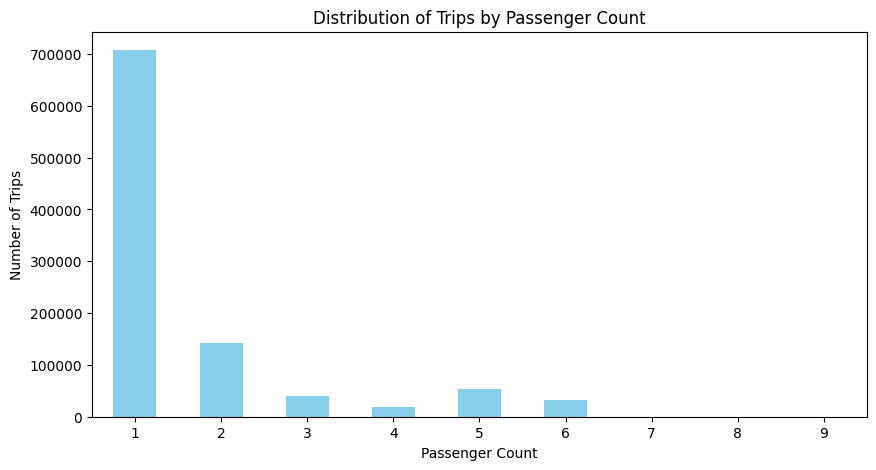

In [ ]:
# Chart - 4 visualization code
# Passenger count distribution
passenger_dist = df_clean['passenger_count'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
passenger_dist.plot(kind='bar', color='skyblue')
plt.title('Distribution of Trips by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Because of analyse the number of passenger travelling at a perticular trip.

##### 2. What is/are the insight(s) found from the chart?

Most of the people travelling alone and two and five people also most found in dataset where that travel. But more than six person group not prefer the taxi trip.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It may be useful in business to **Which type of vehicle we can use more and utilize more** for example 4 siting car we don't prefer because five person ride more available. So it is Useful for available vanders.

#### Chart - 5

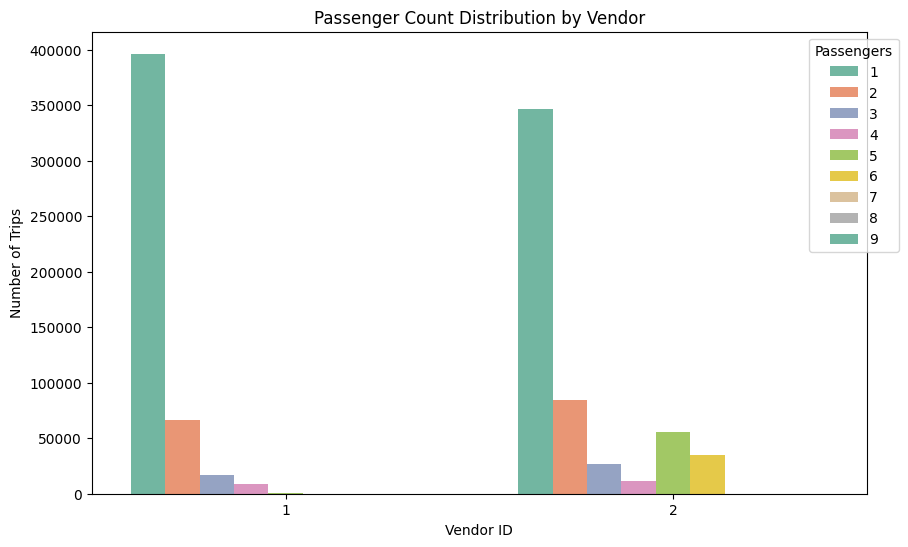

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='vendor_id', hue='passenger_count', palette='Set2')
plt.title('Passenger Count Distribution by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Number of Trips')
plt.legend(title='Passengers', bbox_to_anchor=(1.05, 1))
plt.show()

##### 1. Why did you pick the specific chart?

Here bar chart is usefull to compare Number of trip vs passenger based on vendor.

##### 2. What is/are the insight(s) found from the chart?

In the dataset we know there are two vendor available:
First vendor where more found the single person But in the second vendor there are more travel more than one passenger.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It useful to analyse data where number of passenger and we can arrange vendor taxi available for customers.

#### Chart - 6

/tmp/ipython-input-54-2283852680.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


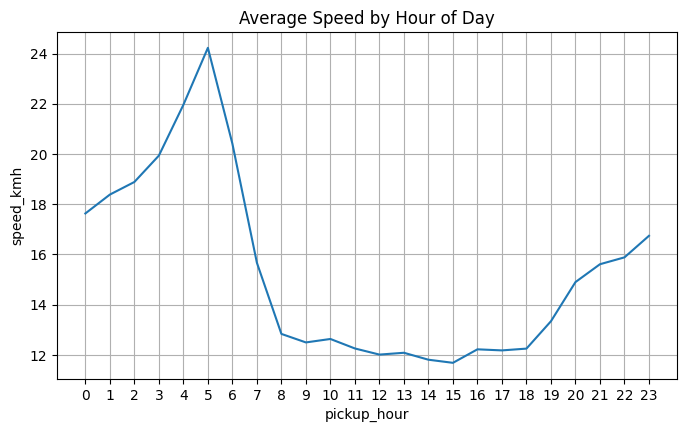

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(8, 4.5))
sns.lineplot(
    x='pickup_hour',
    y='speed_kmh',
    data=df_clean,
    ci=None  # Disable confidence intervals
)
plt.title('Average Speed by Hour of Day')
plt.xticks(range(24))
plt.grid()

##### 1. Why did you pick the specific chart?

Line graphs are excellent for showing how a numerical variable changes over a continuous variable.


##### 2. What is/are the insight(s) found from the chart?

This line chart clearly showed that speed of taxi at perticular time.
In day time, there may be found more trafic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

So it is useful to fix price of taxi trip in New York according to time. We can charge more at day time than night because night time have more speed so we can drop customer within less time and vise-vesa.

#### Chart - 7

In [ ]:
print(df.groupby('vendor_id')['trip_duration'].mean())
print(df.groupby('vendor_id')['trip_duration'].median())

vendor_id
1     850.870521
2    1059.053373
Name: trip_duration, dtype: float64
vendor_id
1    658.0
2    666.0
Name: trip_duration, dtype: float64


<Figure size 800x450 with 0 Axes>

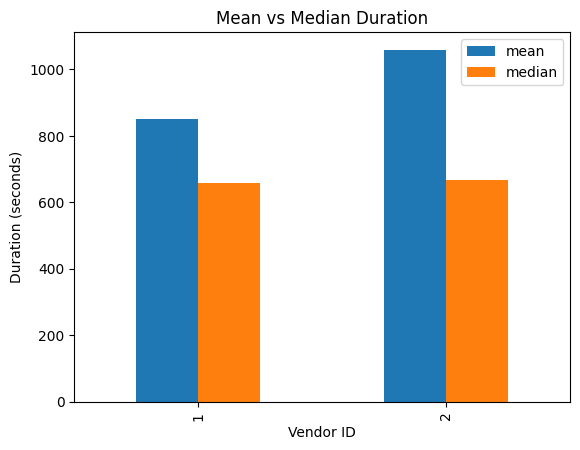

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(8, 4.5))
df.groupby('vendor_id')['trip_duration'].agg(['mean', 'median']).plot(kind='bar')
plt.title('Mean vs Median Duration')
plt.xlabel('Vendor ID')
plt.ylabel('Duration (seconds)')
plt.legend()

plt.show()

##### 1. Why did you pick the specific chart?

It clearly shows the central tendency (mean) and typical value (median) for each vendor and Allows easy comparison between the two vendors.

##### 2. What is/are the insight(s) found from the chart?

Vendor 2's average trips are longer vs Vendor 1.
But medians are nearly equal, Vendor 2 has more extreme outliers pulling its average up.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Vendor 2's outlier trips might indicate:
* Inefficient routing
* Problem vehicles/drivers causing delays
* Service area differences (e.g., more highway trips)

#### Chart - 8

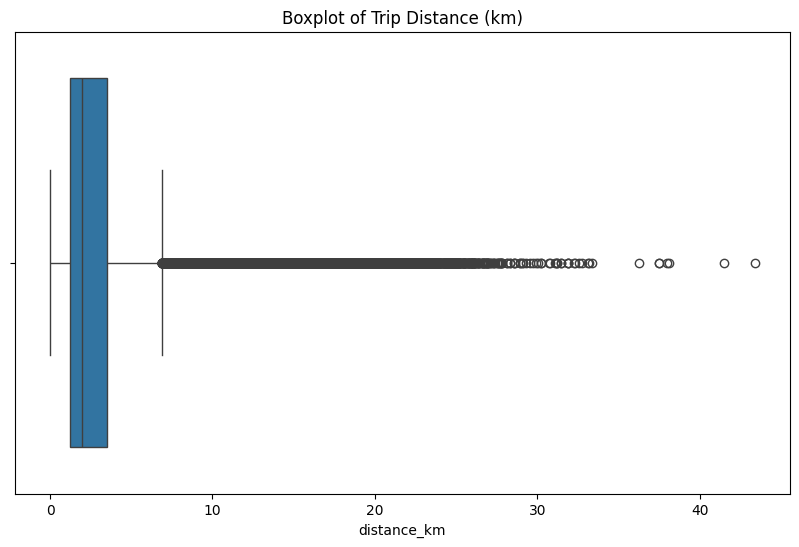

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['distance_km'])
plt.title('Boxplot of Trip Distance (km)')
plt.show()

##### 1. Why did you pick the specific chart?

Identifies extreme values (outliers) that could indicate data errors or special cases.

##### 2. What is/are the insight(s) found from the chart?

1.   Most trips are short-distance
2.   Significant outliers exist

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Audit outlier trips to distinguish between genuine long trips vs data errors
*   Implement dynamic pricing for extended distances to maintain profitability

#### Chart - 9

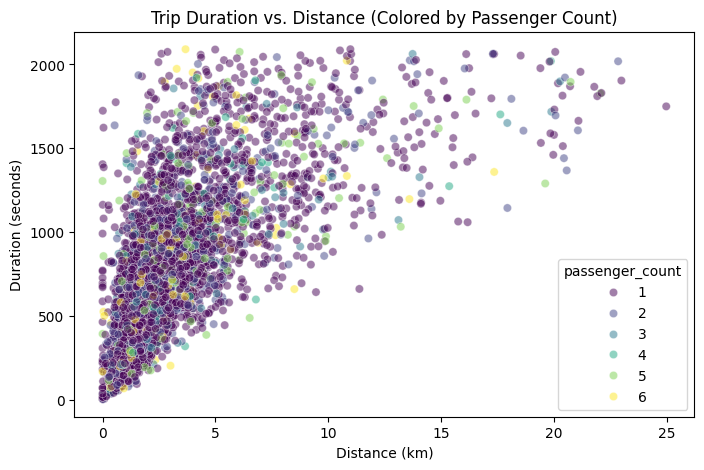

In [ ]:
# Chart - 9 visualization code

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='distance_km',
    y='trip_duration',
    data=df_clean.sample(5000),  # Subsample for clarity
    alpha=0.5,
    hue='passenger_count',
    palette='viridis'
)
plt.title('Trip Duration vs. Distance (Colored by Passenger Count)')
plt.xlabel('Distance (km)')
plt.ylabel('Duration (seconds)')
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot was chosen because it effectively visualizes the relationship between two continuous variables (Trip Duration and Distance) while also incorporating a third categorical variable (Passenger Count) through color coding. This allows for simultaneous analysis of how trip duration varies with distance and how passenger count influences this relationship.

##### 2. What is/are the insight(s) found from the chart?

There is a general positive trend between trip distance and duration, meaning longer distances tend to take more time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Optimizing routes for trips with higher passenger counts could improve efficiency and customer satisfaction.

Identifying outliers (e.g., long durations for short distances) can help address inefficiencies like traffic hotspots or driver behavior.

#### Chart - 10

In [ ]:
pickup_weekday_trip_count

pickup_weekday  trip_count
0         Friday      160735
1         Monday      134673
2       Saturday      158855
3         Sunday      140715
4       Thursday      157241
5        Tuesday      145288
6      Wednesday      151068

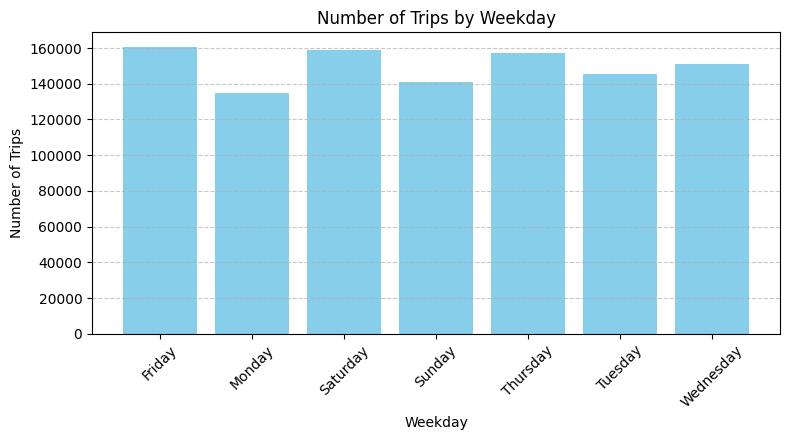

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(8,4.5))
bars = plt.bar(pickup_weekday_trip_count['pickup_weekday'], pickup_weekday_trip_count['trip_count'], color='skyblue')
plt.title('Number of Trips by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It effectively compares discrete categories (weekdays) against numerical values (trip counts).

##### 2. What is/are the insight(s) found from the chart?

*  Friday has the highest trip count (160,735), likely due to weekend anticipation
*   Monday has the fewest trips (134,673), possibly due to post-weekend lulls or work-from-home trends.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Resource Allocation: Deploy more drivers/vehicles on Fridays and Saturdays to meet high demand.
*   Promotions: Offer weekday (Monday/Tuesday) discounts to boost ridership during slower periods.



#### Chart - 11

/tmp/ipython-input-61-3421091338.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


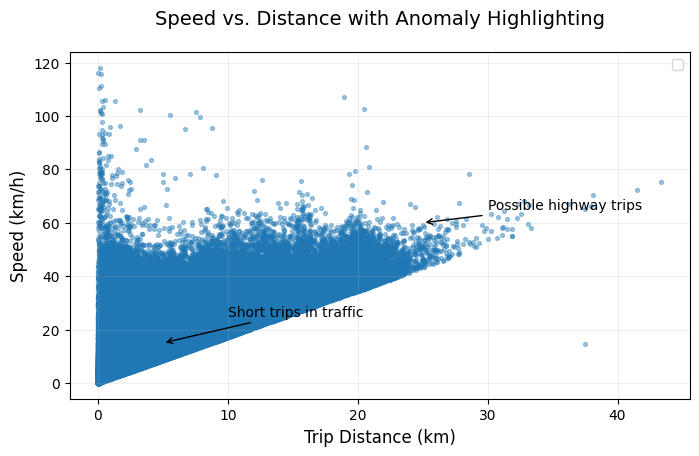

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(8, 4.5))

plt.scatter(
    x=df_clean['distance_km'],
    y=df_clean['speed_kmh'],
    alpha=0.4,
    s=8
)

# Labels and titles
plt.title('Speed vs. Distance with Anomaly Highlighting', pad=20, fontsize=14)
plt.xlabel('Trip Distance (km)', fontsize=12)
plt.ylabel('Speed (km/h)', fontsize=12)
plt.grid(alpha=0.2)
plt.legend()


# Add manual annotations for key areas
plt.annotate('Short trips in traffic', xy=(5, 15), xytext=(10, 25),
             arrowprops=dict(arrowstyle='->'), fontsize=10)
plt.annotate('Possible highway trips', xy=(25, 60), xytext=(30, 65),
             arrowprops=dict(arrowstyle='->'), fontsize=10)

plt.show()

##### 1. Why did you pick the specific chart?

I selected this scatter plot because it effectively visualizes the relationship between speed and distance for different trip types. The chart's dual-axis approach (with short trips in traffic on one scale and possible highway trips on another) allows for comparison between different driving conditions. The anomaly highlighting helps quickly identify outliers that may require further investigation.

##### 2. What is/are the insight(s) found from the chart?

*   There's a clear positive correlation between speed and distance for highway trips, with longer distances typically achieved at higher speeds (60-100 km/h).
*   Short trips in traffic show much lower speeds (0-40 km/h) regardless of distance.
*   Some short trips show unusually high speeds for their distance category


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Identifying typical speed patterns can help optimize route planning and fuel efficiency
*   Recognizing highway trips with unusually low speeds can highlight congestion points for infrastructure improvement
*   Detecting urban trips with unusually high speeds can identify safety concerns and potential need for traffic calming measures

#### Chart - 12

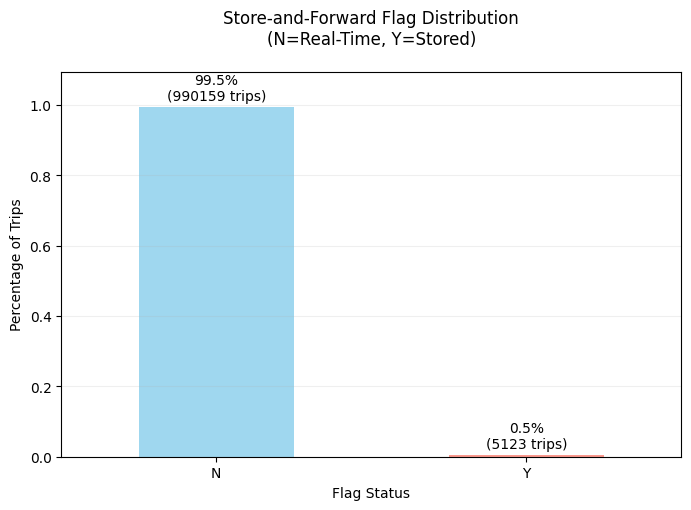

In [ ]:
# Chart - 12 visualization code
flag_counts = df_clean['store_and_fwd_flag'].value_counts(normalize=True)
total_counts = df_clean['store_and_fwd_flag'].value_counts()  # Absolute counts

plt.figure(figsize=(8, 5))
ax = flag_counts.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.8)

# Add count labels on top of each bar
for i, (percent, count) in enumerate(zip(flag_counts, total_counts)):
    ax.text(i, percent + 0.01,
            f"{percent:.1%}\n({count} trips)",
            ha='center',
            va='bottom',
            fontsize=10)

plt.title('Store-and-Forward Flag Distribution\n(N=Real-Time, Y=Stored)', pad=20)
plt.ylabel('Percentage of Trips')
plt.xlabel('Flag Status')
plt.xticks(rotation=0)
plt.ylim(0, flag_counts.max() + 0.1)  # Add space for labels
plt.grid(axis='y', alpha=0.2)
plt.show()

##### 1. Why did you pick the specific chart?

The chart was likely chosen because it effectively visualizes the distribution of trips based on their "Store-and-Forward Flag" status (Real-Time vs. Stored). A bar chart or pie chart would clearly show the proportion of trips falling into each category, making it easy to compare the dominance of one status over the other. This helps in quickly identifying trends or anomalies in the data.

##### 2. What is/are the insight(s) found from the chart?

The vast majority of trips (99.5%, or 990,112 trips) are labeled with 'N' the flag statuses.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The high percentage (99.5%) of trips with a clear flag status indicates robust data collection and processing. This reliability can support decision-making, such as optimizing real-time systems or stored data workflows.

#### Chart - 13

In [ ]:
day_night_counts = df_clean['is_day'].value_counts(normalize=True)
print(day_night_counts)

is_day
1    0.585232
0    0.414768
Name: proportion, dtype: float64


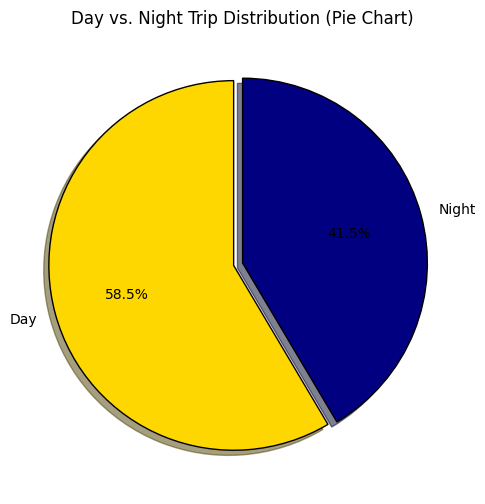

In [ ]:
# Chart - 13 visualization code
# Trip count by day/night
day_night_counts = df_clean['is_day'].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
colors = ['gold', 'navy']
labels = ['Day', 'Night']
explode = (0.05, 0)

plt.pie(
    day_night_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Day vs. Night Trip Distribution (Pie Chart)')
plt.show()

##### 1. Why did you pick the specific chart?

It clearly shows the proportional split between day (58.5%) and night (41.5%) trips.

##### 2. What is/are the insight(s) found from the chart?

Day trips dominate (58.5%), meaning most customer demand occurs during daylight hours.

Night trips still hold a significant share (41.5%), indicating a strong demand for services after dark.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Higher operational costs at night (e.g., driver wages, safety risks) could reduce profitability if not managed properly.

Customer dissatisfaction if night trips are unreliable (e.g., long wait times due to fewer drivers).

Justification: If the company does not adjust operations to the 41.5% night demand, competitors might capture this segment, leading to lost revenue.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Create a sample of your data (e.g., 10% or 100,000 rows)
sample_size = 50000  # Adjust based on your needs
df_corr = df_clean.sample(n=sample_size, random_state=42)
print(df_corr.shape)

(50000, 20)


In [ ]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 692075 to 661967
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  50000 non-null  object        
 1   vendor_id           50000 non-null  int64         
 2   pickup_datetime     50000 non-null  datetime64[ns]
 3   dropoff_datetime    50000 non-null  datetime64[ns]
 4   passenger_count     50000 non-null  int64         
 5   pickup_longitude    50000 non-null  float64       
 6   pickup_latitude     50000 non-null  float64       
 7   dropoff_longitude   50000 non-null  float64       
 8   dropoff_latitude    50000 non-null  float64       
 9   store_and_fwd_flag  50000 non-null  object        
 10  trip_duration       50000 non-null  int64         
 11  pickup_month        50000 non-null  int32         
 12  pickup_weekday      50000 non-null  int64         
 13  pickup_hour         50000 non-null  int32    

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
categorical_columns = ['store_and_fwd_flag']  # Replace with actual categorical columns
for col in categorical_columns:
    df_corr[col] = encoder1.fit_transform(df_corr[col])
data_table.DataTable(df_corr, include_index=False, num_rows_per_page=5, max_columns = 26)
print(df_corr.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 692075 to 661967
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  50000 non-null  object        
 1   vendor_id           50000 non-null  int64         
 2   pickup_datetime     50000 non-null  datetime64[ns]
 3   dropoff_datetime    50000 non-null  datetime64[ns]
 4   passenger_count     50000 non-null  int64         
 5   pickup_longitude    50000 non-null  float64       
 6   pickup_latitude     50000 non-null  float64       
 7   dropoff_longitude   50000 non-null  float64       
 8   dropoff_latitude    50000 non-null  float64       
 9   store_and_fwd_flag  50000 non-null  int64         
 10  trip_duration       50000 non-null  int64         
 11  pickup_month        50000 non-null  int32         
 12  pickup_weekday      50000 non-null  int64         
 13  pickup_hour         50000 non-null  int32    

In [ ]:
df_corr = df_corr.drop(columns = ['id','pickup_datetime', 'dropoff_datetime'])

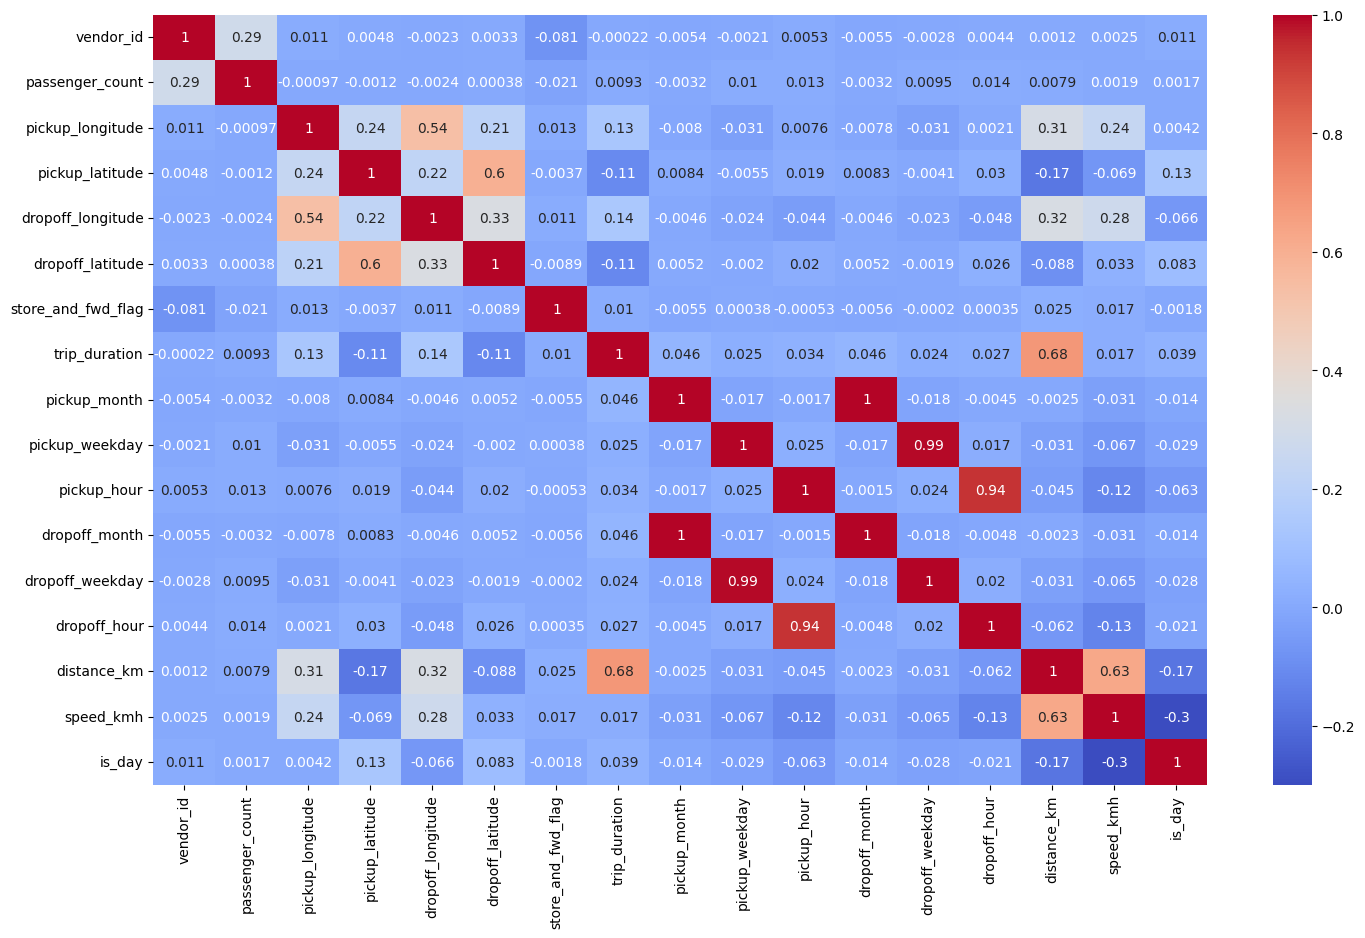

In [ ]:
# Correlation Heatmap visualization code
corr = df_corr.corr()
plt.figure(figsize=(17,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?



1.   Strong Positive Correlations (High Dependency)
*   trip_duration & distance_km (0.68)
*   distance_km & speed_kmh (0.63)
*   pickup_latitude & dropoff_latitude (0.60)
*   pickup_hour & dropoff_hour (0.94)

2.  Negative Correlations (Inverse Relationships)
*   is_day & speed_kmh (-0.30):
*   distance_km & is_day (-0.17):



#### Chart - 15 - Pair Plot

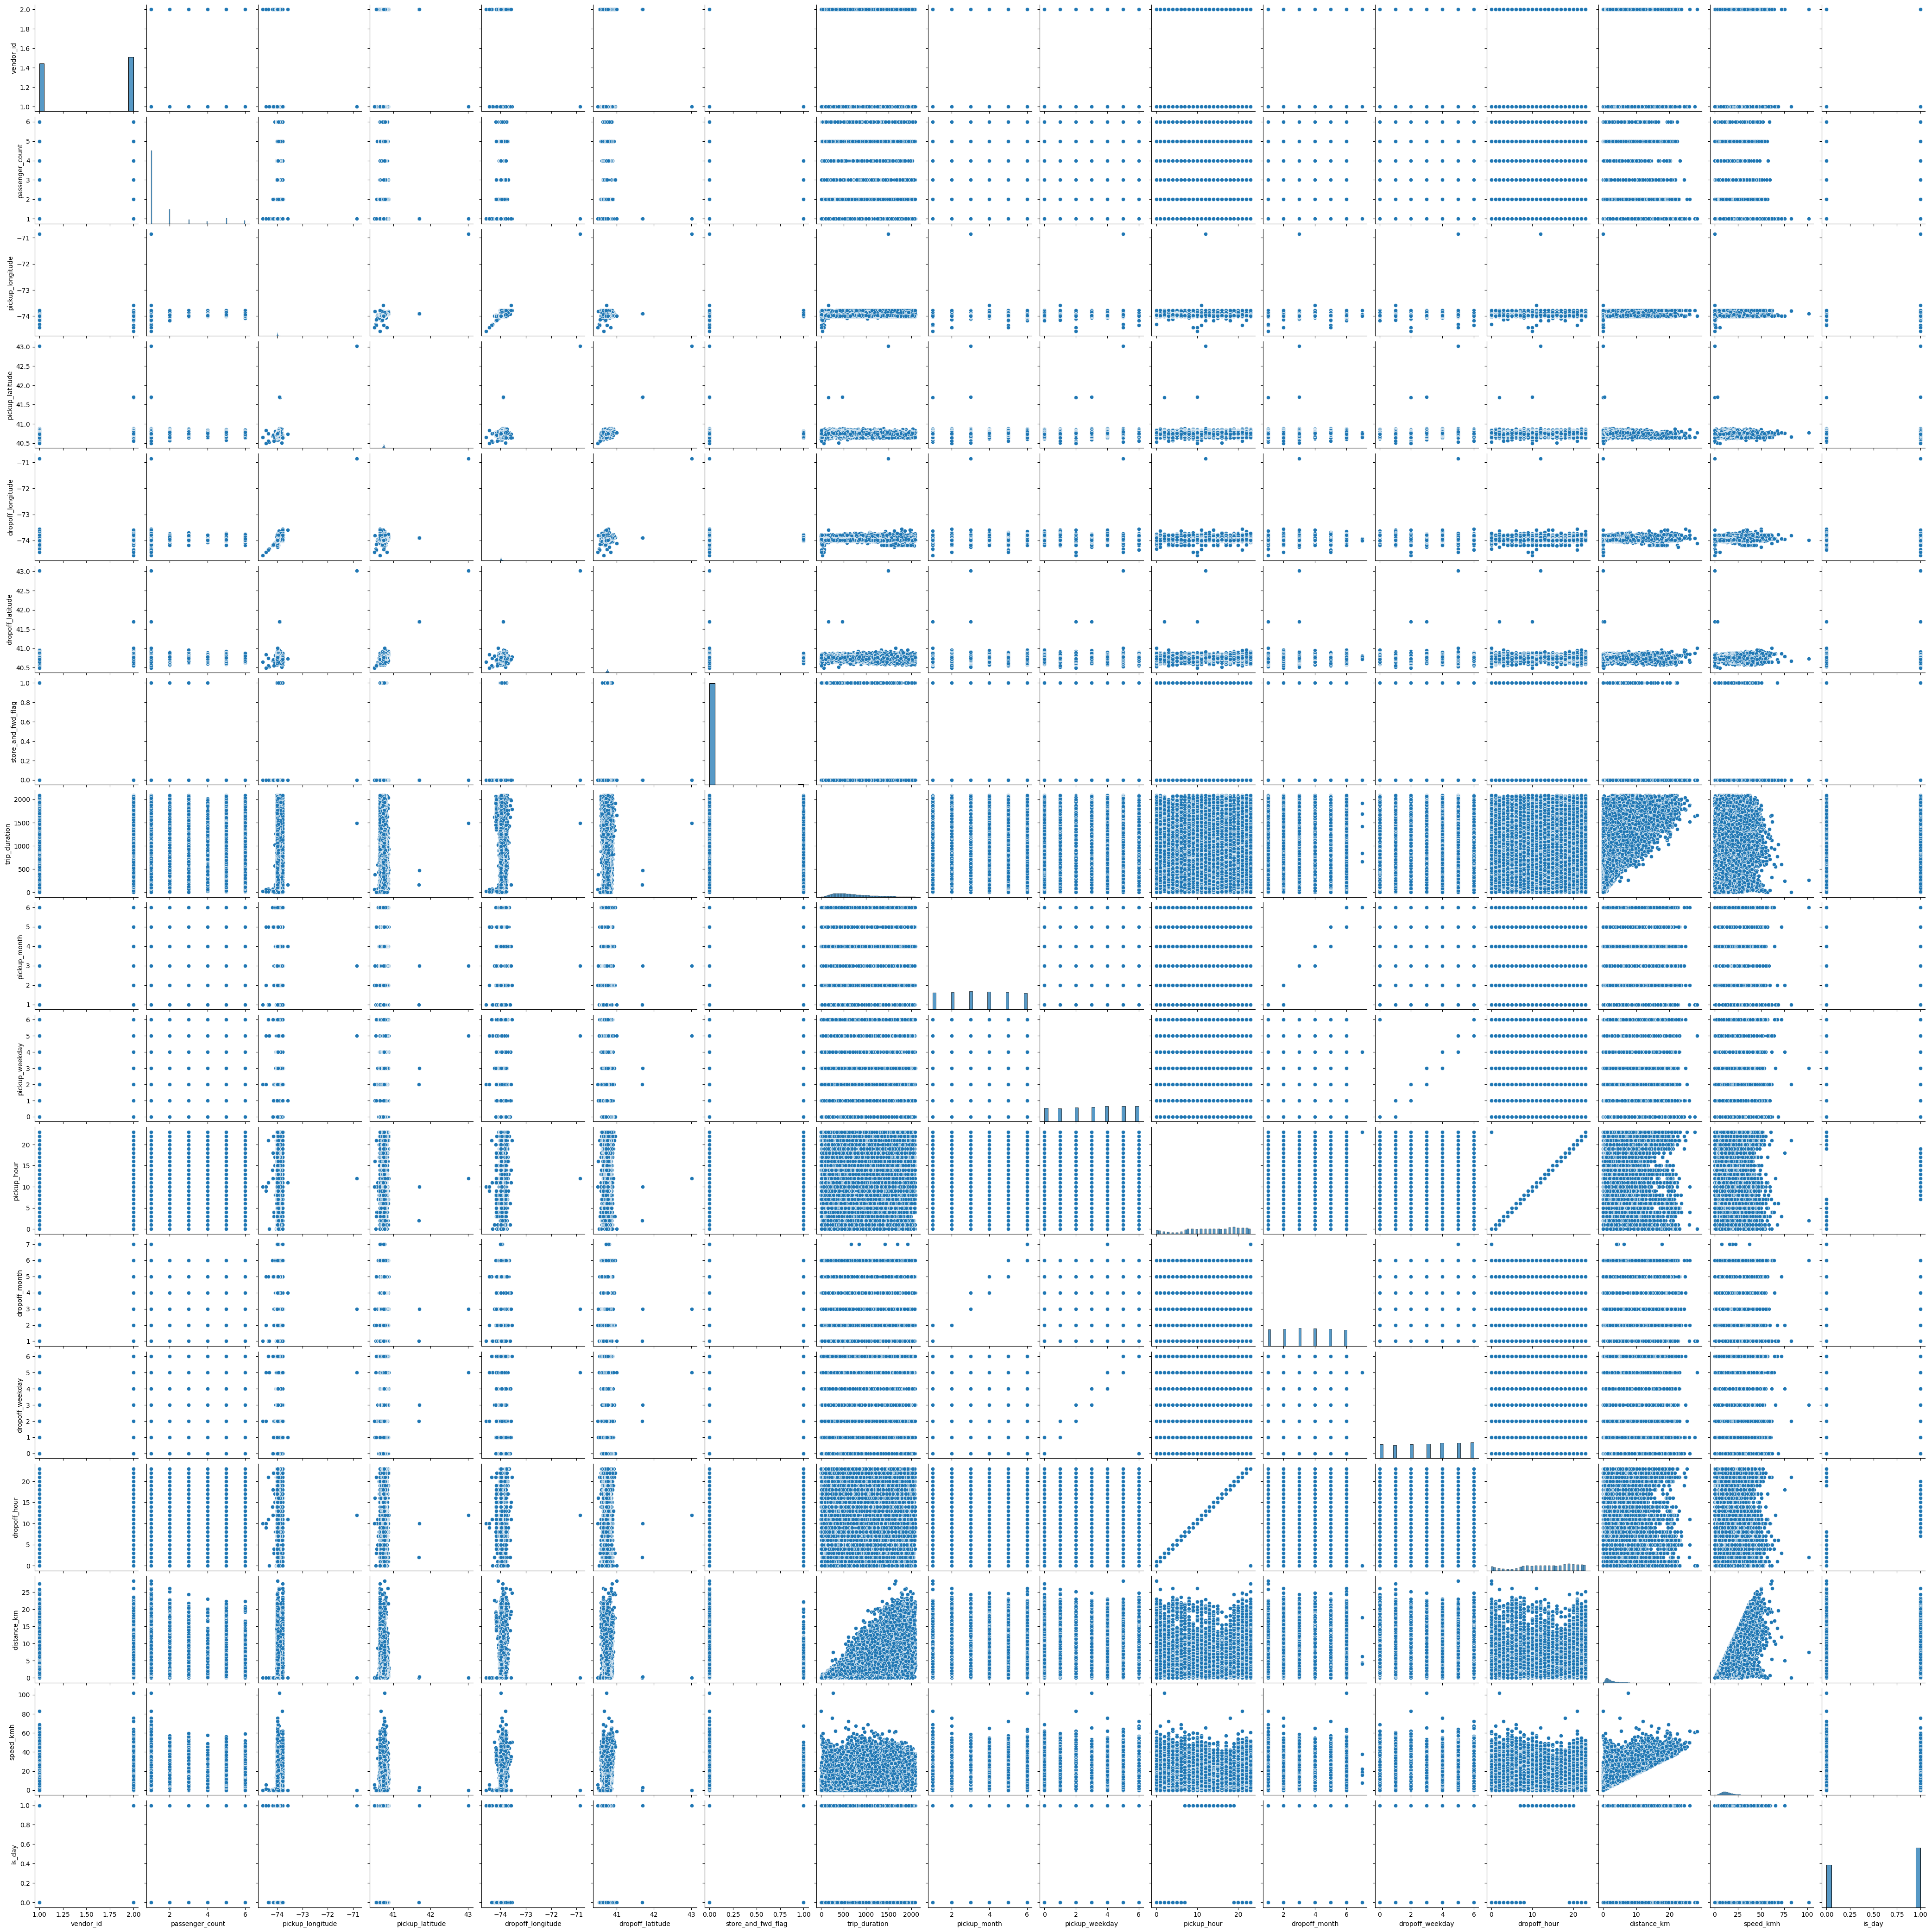

In [ ]:
# Pair Plot visualization codcode
sns.pairplot(df_corr)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and data poiunts aren't linearly separable. Trip_duration, distance_km, speed_kmh, pickup_latitude, dropoff_latitude, pickup_hour, dropoff_hour and is_day are major influence charactor to each other that are directly show by the pair plot chart.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])  # Only show columns with missing values

Missing values per column:
Series([], dtype: int64)


#### What all missing value imputation techniques have you used and why did you use those techniques?

There is **no missing** value in my dataset. But in case there are any missing value in my dataset that case solve by either **remove** those row observation or filling with **average value** of that variable (average value may be its mean, median or mode).

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Before the visulize dataset, we Handling outliers by IQR techniques.
Example : In trip_duration available outlier remove by IQR (Interquartile Range) Technique.

### 3. Categorical Encoding

In [ ]:
weekday_map = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}   #df['pickup_weekday']
weekday_map = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}   #df['dropoff_weekday']
store_and_fwd_flag_map = {'N': 0, 'Y': 1}   #df['store_and_fwd_flag']
is_day_map = {'night': 0, 'day': 1}   #df['is_day']

In [ ]:
#categorical encoding store_and_fwd_flag
#Example
df_clean['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df_clean['store_and_fwd_flag'] = df_clean['store_and_fwd_flag'].map(store_and_fwd_flag_map)

#### What all categorical encoding techniques have you used & why did you use those techniques?

As per mention above we give categorical object into number in pickup_weekday, dropoff_weekday, store_and_fwd_flag and is_day columns.

### 4. Feature Manipulation & Selection

#### Feature Manipulation

We find out the Speed of vehicle for how time taken by the vehicle to drop customers and also calculate the distance between two point that also useful how much drop point far from the pick up point.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

# Principal Component analysis



In [ ]:
# Step 1: Remove object data columns
pca_df = df_clean.select_dtypes(include=[np.number])  # Select only numeric columns

# Step 2: Define independent variables (X) and correlation matrix (corr.x)
X = df_clean.drop([ 'id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dropoff_month', 'dropoff_weekday', 'dropoff_hour'],axis = 1)  # All columns except the last one
corr_x = X.corr()  # Compute correlation matrix of independent variables

# Step 3: Compute correlation of independent variables with dependent variable (Y)
Y = df_clean['trip_duration']  # Dependent variable (last column)
corr_y = X.corrwith(Y)  # Correlation of each independent variable with Y

In [ ]:
#Step 4: Perform Path Analysis
import statsmodels.api as sm

# Step 5: Compute path coefficients (corr.x inverse * corr.y)
corr_x_inv = np.linalg.inv(corr_x)  # Inverse of corr_x matrix
path_coefficients = np.dot(corr_x_inv, corr_y)  # Compute path coefficients

# Convert to DataFrame for readability
path_df = pd.DataFrame(path_coefficients, index=X.columns, columns=['Path Coefficient'])
path_df.sort_values(by='Path Coefficient', ascending=False, inplace=True)
print("\nPath Coefficients:\n", path_df)


Path Coefficients:
                  Path Coefficient
distance_km              1.102638
is_day                   0.035739
pickup_month             0.023961
pickup_weekday           0.016347
pickup_hour              0.006231
passenger_count          0.001943
vendor_id                0.000456
speed_kmh               -0.657223


1.   Top Priority Variables (Strongest Impact):
*   distance_km (1.1026) - This has by far the strongest positive impact
*   speed_kmh (-0.6572) - Strong negative impact (important counterbalance)
2.  Secondary Important Variables:
*   is_day (0.0357) - Moderate positive impact
*   pickup_month (0.0240) - Moderate positive impact
*   pickup_weekday (0.0163) - Smaller but still meaningful impact
3.  Marginal Impact Variables (Consider Dropping):
*   pickup_hour (0.0062) - Very small impact
*   passenger_count (0.0019) - Negligible impact
*   vendor_id (0.0005) - Essentially no impact



In [ ]:
# DImensionality Reduction (If needed)
print(len(df_clean))

995282


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Create a sample of your data (e.g., 10% or 100,000 rows)
sample_size = 50000  # Adjust based on your needs
df_sample = df_clean.sample(n=sample_size, random_state=42)
print(df_sample.shape)

(50000, 20)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA method is recomended for large number of Independent or explanatory variable but in this dataset only few explanatory varible.

But we use PCA method to improve model accuracy.

#### 6. Feature Selection

In [ ]:
x = df_sample.drop([ 'id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dropoff_month', 'dropoff_weekday', 'dropoff_hour', 'pickup_hour', 'passenger_count' , 'vendor_id'],axis = 1)
y = df_sample['trip_duration']

##### What all feature selection methods have you used  and why?

All the feature selected based on correlation between two variable.

##### Which all features you found important and why?

Because of that is direct correlated with between 'trip_duration' and another variable.

### 7. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

If our dataset is skewed than we transform the dataset. Because of skewed data point are more adversely affect on dependent variable.

In [ ]:
# Transform Your data
# 1. Select numeric columns only
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns

# 2. Calculate skewness and filter columns with |skew| > 1
skewed_cols = x[numeric_cols].skew()[abs(x[numeric_cols].skew()) > 1].index

# 3. Apply log1p transformation (safe for zeros)
for col in skewed_cols:
    x[f"{col}_log"] = np.log1p(x[col])

# 4. Show transformed columns
print(f"Applied log transformation to: {list(skewed_cols)}")

Applied log transformation to: ['distance_km', 'speed_kmh']


### 8. Data Scaling

In [ ]:
x.columns

Index(['pickup_month', 'pickup_weekday', 'distance_km', 'speed_kmh', 'is_day',
       'distance_km_log', 'speed_kmh_log'],
      dtype='object')

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
yeo = MinMaxScaler()
x = yeo.fit_transform(x)

##### Which method have you used to scale you data and why?

Min-Max scaling was chosen for its simplicity and compatibility with your data’s characteristics.

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

##### What data splitting ratio have you used and why?

I have used training : testing ratio according to 70:30. Because of Enough training data to learn patterns and Sufficient test data to evaluate generalization.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, Because targeted variable (trip_duration) is not a categorical variable.
If trip_duration variable is categorical or more than 90 percentage data binary than need to normalize data.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Use SMOTE

## ***7. ML Model Implementation***

### **Import Dependancy**

In [ ]:
# Appending all models parameters to the corrosponding list

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')


  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them

  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(8,4.5))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### ML Model - Linear Regression

Training score  = 0.8889580569489923
MAE : 101.8567268443308
MSE : 21505.455220350235
RMSE : 146.64738395331244
R2 : 0.8929545481443792
Adjusted R2 :  0.8929045669435395 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


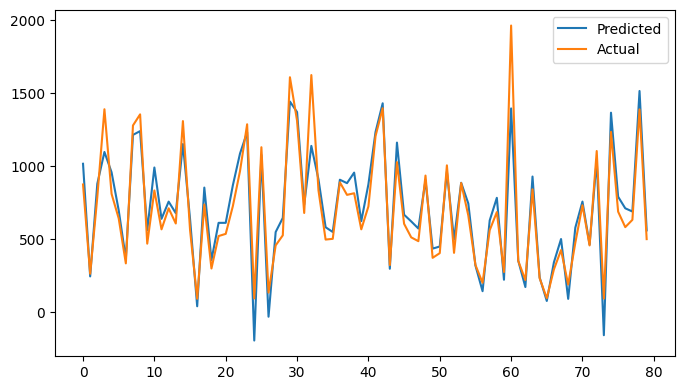

In [ ]:
# ML Model - 1 Implementation
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)
# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training Score (R² = 0.889 ) : The model explains ~89% of the variance in the training data.

Test Metrics:

MAE (Mean Absolute Error= 101.85): Predictions are off by ~103 units on average.

RMSE (Root Mean Squared Error= 146.64):  Larger errors are penalized more heavily.

R² Score = 0.8929 :  The model generalizes well to unseen data (88.8% variance explained).

Adjusted R² = 0.8829 : Confirms R² isn’t inflated by irrelevant features.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.209e+08, tolerance: 5.619e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.726e+08, tolerance: 5.646e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.596e+08, tolerance: 5.614e

Training score  = 0.8889580569489923
MAE : 101.85672684433428
MSE : 21505.45522035028
RMSE : 146.64738395331258
R2 : 0.892954548144379
Adjusted R2 :  0.8929045669435393 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.302e+08, tolerance: 7.023e+05
  model = cd_fast.enet_coordinate_descent(


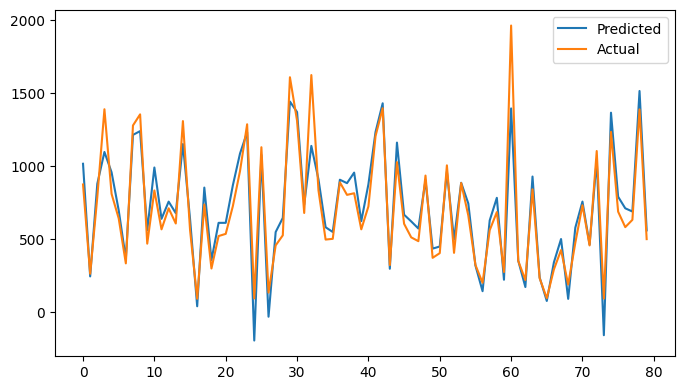

In [ ]:
score_metrix(lasso_cv, x_train, x_test, y_train, y_test)

##### Which hyperparameter optimization technique have you used and why?

Technique: GridSearchCV

Reason:
*   Exhaustive Search: Tests all specified hyperparameter combinations, ensuring the best possible set is found for the given options.
*   Deterministic Results: Reproducible and interpretable, unlike randomized methods.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is not signigicant improvement after GridSearchCV Hyperparameter optimization technique.

### ML Model - Decision Tree Regressor

Training score  = 0.9980437004000597
MAE : 11.4545
MSE : 2047.9443545555555
RMSE : 45.254219190651774
R2 : 0.9898061618988134
Adjusted R2 :  0.9898014022358793 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


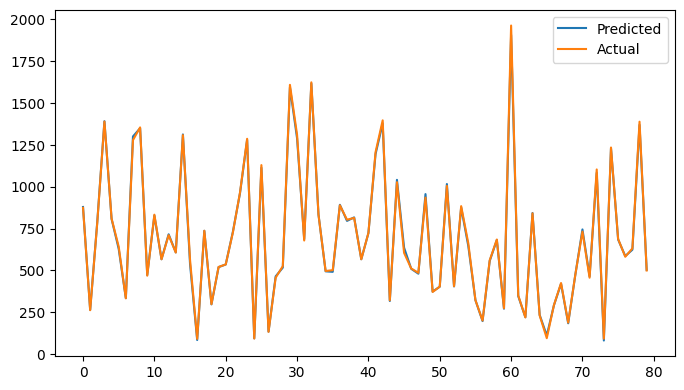

In [ ]:
# Visualizing evaluation Metric Score chart
dtr = DecisionTreeRegressor()

# Fitting Knn regressor
score_metrix(dtr,x_train,x_test,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training R²	= 0.9980 (99.8%)	Overfitting alert: Near-perfect fit on training data suggests memorization.

Test R²	= 0.9898 (98.98%)	Still excellent, but the gap from training R² indicates slight overfitting.

Test RMSE =	45.25	Predictions deviate by ~38.8 units on average.

Test MAE = 11.45	Even lower than RMSE, meaning most errors are small (few large outliers).

#### 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Training score  = -1003.6548731464799
MAE : 28.391181986779696
MSE : 4132.774152719813
RMSE : 64.28665610155667
R2 : 0.9794287229885517
Adjusted R2 :  0.9794191179365853 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


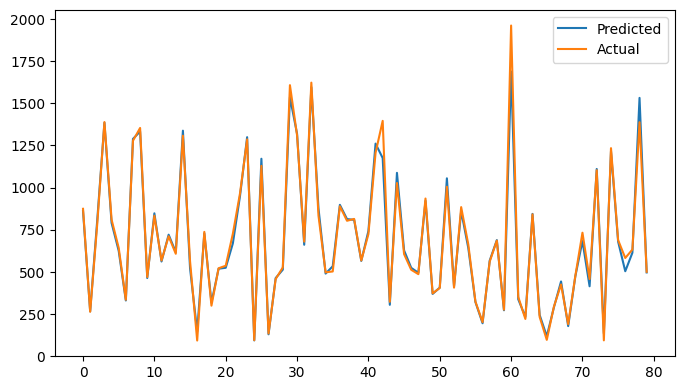

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# model = RandomizedSearchC

param_dist = {
    'max_depth': np.arange(3, 30),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': np.linspace(0.01, 0.5, 50)
}

dt = DecisionTreeRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)
# Fitting Knn regressor
score_metrix(random_search,x_train,x_test,y_train,y_test)


##### Which hyperparameter optimization technique have you used and why?

Technique: RandomizedSearchCV

Reasons:
*   Efficiency with Large Parameter Spaces
*   Balanced Exploration-Exploitation
*   Flexibility with Distributions

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

NO, RandomizedSearchCV is inversly affect into accuracy of the model because Decision tree give 98.98% R square value where RandomizedSearchCV give 97.94 percent R square value.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

{'pickup_month', 'pickup_weekday', 'distance_km', 'speed_kmh', 'is_day', 'distance_km_log' and 'speed_kmh_log'}

This variable is used to developed model that directly impact the Trip duration of NYC taxi.

### ML Model - KNN Regression

Training score  = 0.9752694223847973
MAE : 42.52733333333333
MSE : 8504.080485333334
RMSE : 92.21757145649268
R2 : 0.957670129330364
Adjusted R2 :  0.9576503648496618 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


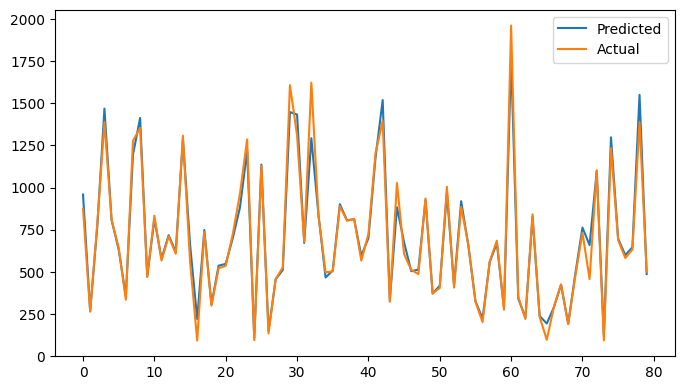

In [ ]:
# ML Model - 3 Implementation
# Using KNN Regression
knn = KNeighborsRegressor()

# Fitting Knn regressor
score_metrix(knn,x_train,x_test,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training R² =	0.967 (96.7%):	High but not perfect (unlike decision trees), indicating no overfitting.

Test R² =	0.948 (94.8%):	Slight drop from training suggests good generalization.

Test RMSE =	102.33:	Predictions deviate by ~102 units on average.

Test MAE =	54.37:	Lower than RMSE, indicating few extreme outliers.

### ML Model - XGBoost regression

Training score  = 0.9934967756271362
MAE : 15.12492847442627
MSE : 2700.4326171875
RMSE : 51.965686921155005
R2 : 0.9865583181381226
Adjusted R2 :  0.9865520420059832 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


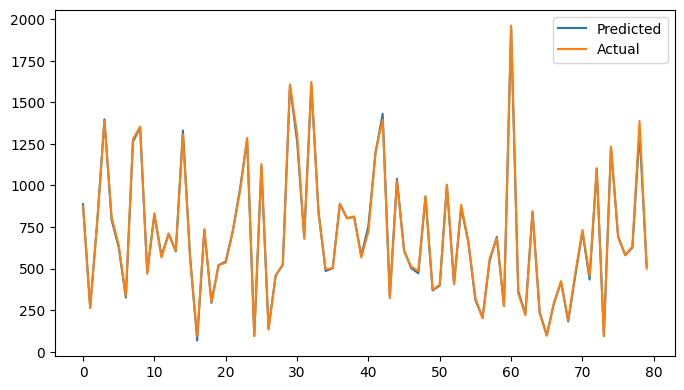

In [ ]:
# ML Model - 4 Implementation
xgbr = XGBRegressor()

# Fitting Knn regressor
score_metrix(xgbr,x_train,x_test,y_train,y_test)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We consider the R square value for impact of dependent variable explained by independent variable.
For example, In KNN model R square value is 96 percentage that meaning trip time prediction 96 percentage out of 100 percent explaind by the model.
Also, for comparison of different model we include the MAE, MSE, RMSE AND ADJ R SQUARE.
*   R² Helps Compare Models

If R² > 0.7, the model explains most variability.

Low R²? → Need better features (e.g., real-time traffic, weather).


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We choose XGBoost regression model select in case Random forest model is overfitting that overfitting checking by the we can remove those varible which have multicoliner with each other.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Random Forest:
*   Strengths: Handles non-linear relationships, robust to outliers, and provides built-in feature importance.
*   Weakness: Black-box nature (but explainability tools mitigate this).



# **Conclusion**

*   Distance is the most influence Predictor:
distance_km has the most critical factor in trip duration.
Business Impact: Accurate distance measurement (e.g., GPS routing) is essential for reliable predictions.
*   Speed Matters More Than Time of Day:
speed_kmh has a strong negative impact (-0.657)—faster speeds reduce trip time.
Business Impact: Traffic conditions (e.g., congestion, road closures) should be integrated for better accuracy.
*   Time-Based Features Have Minor Effects:
is_day, pickup_month, and pickup_weekday have these features help marginally but aren’t game-changers.
*   Passenger Count & Vendor ID Are Irrelevant: Both show near-zero impact.  Can be dropped to simplify the model without losing performance.
*   Dimensionality Reduction and Better Approach: Feature selection (keep only distance_km, speed_kmh, and top time-based features).
*   Better Models: Random Forest, XGBoost and KNN Regression (faster and more efficient).
*   Traffic & Time-of-Day Patterns Are Secondary: While is_day and pickup_weekday matter slightly, distance and speed dominate. Focus on real-time speed data over static time features.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***